Author: Trenton Bricken @trentbrick

In [ ]:
import numpy as np 
from scipy.stats import norm, multivariate_normal
import matplotlib.pyplot as plt
import pandas as pd

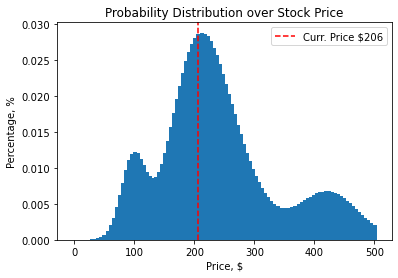

In [99]:
# mixture of gaussians to display probability distribution

# parameters to change: 
# This fictional example is my current model for Moderna stock MRNA.
curr_price =206
max_price = 500
# reminder to think about the time interval over which this will happen and relevant reference points. 
mus_stds = [ (420, 50), (100, 20), (200,40), (250, 50) ] # give mu and then std as a tuple
weights = [0.3,0.2,0.7, 0.6] # don't have to sum to one, will be normalized to ensure they are
net_worth = 100000 # total net worth, Kelly criterion will tell you what fraction to invest
#####################

# other parameters:
verbose = False
min_price = 0 # recommend this stays fixed. 
resolution = 10000 # number of points to generate the distribution plots
bins = 100 # may want to change to chunk the plot's values so they are meaningful probabilities. 
###################

x = np.linspace(min_price, max_price,resolution) #np.concatenate([np.linspace(80, 120, resolution), np.linspace(180, 220, resolution)])
y = np.zeros(resolution)
weights = np.asarray(weights)/sum(weights)
assert len(weights) == len(mus_stds), "Missing a distribution or weighting for it!"
for mu_std, weight in zip(mus_stds, weights):
    mu, std = mu_std
    temp=norm.pdf(x, mu, std)
    y+= temp*weight
    if verbose: 
        plt.scatter(x, temp)
        plt.show()
y=y/sum(y)

bar_centers = np.linspace(min_price, max_price, bins)
y_bars = np.asarray(np.split(y,bins)).sum(axis=1)

if verbose: 
    plt.scatter(x, y)
    plt.title("Raw Output for every discretized point")
    plt.show()
plt.figure()    
plt.bar(bar_centers, y_bars, width=7)
plt.axvline(curr_price, color='red', linestyle='dashed', label="Curr. Price $"+str(curr_price))
plt.legend()
plt.ylabel("Percentage, %")
plt.xlabel("Price, $")
plt.title("Probability Distribution over Stock Price")
plt.show()

In [100]:
# Perform Kelly Betting Calculations, print some things along the way. 
expected_price = sum(x*y)
print("expected price: $", np.round(expected_price,2), 'expected gain/loss: $',  np.round(expected_price-curr_price,2))

win_mask = x>curr_price
win_prob = sum(y[win_mask])
normalized_win_probabilities = y[win_mask]/sum(y[win_mask])
expected_win = sum( (x[win_mask]-curr_price) * normalized_win_probabilities) # win amount weighted by the probability of winning this amount 
win_fraction = expected_win/curr_price
print('win prob:',np.round(win_prob,3), 'win amount: $',np.round(expected_win,2))

loss_mask = x<=curr_price
loss_prob = sum(y[loss_mask])
normalized_loss_probabilities = y[loss_mask]/sum(y[loss_mask])
expected_loss = sum( (x[loss_mask]-curr_price) * normalized_loss_probabilities) # loss amount weighted by the probability of losing this amount 
loss_fraction = -(expected_loss/curr_price)
print('loss prob:', np.round(loss_prob,3), 'loss amount: $',np.round(expected_loss,2))
f_star = (win_prob/ loss_fraction) - (loss_prob/win_fraction)
print("="*40)
print("fraction of net worth to invest:", np.round(f_star,3))
print("amount of money to invest $", np.round(net_worth*(f_star-1),2))
print("="*40)

expected price: $ 239.65 expected gain/loss: $ 33.65
win prob: 0.605 win amount: $ 90.65
loss prob: 0.395 loss amount: $ -53.48
fraction of net worth to invest: 1.43
amount of money to invest $ 43000.76
